**1.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

读入数据并选择相应的区域

In [2]:
data = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds = data.sel(lat=slice(-5,5), lon=slice(190,240))
ds

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

把数据按月分组，然后我们就能得到每月的SST，根据公式进行计算就可以得到anomaly SST

In [3]:
group_data = ds.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
print(sst_anom.values)

[[[-0.43157768 -0.41846275 -0.39795303 ... -0.2116642  -0.23776245
   -0.24401474]
  [-0.41259003 -0.4067192  -0.3875141  ... -0.52064896 -0.5346451
   -0.51997185]
  [-0.40932274 -0.39743805 -0.36237717 ... -0.6373882  -0.6171951
   -0.583725  ]
  [-0.4140854  -0.37909317 -0.3215618  ... -0.43292618 -0.38404274
   -0.3352623 ]
  [-0.5043678  -0.43894005 -0.3710251  ... -0.17453575 -0.11044502
   -0.06918144]]

 [[-0.5374584  -0.52739716 -0.50823593 ... -0.40254593 -0.44382668
   -0.45287704]
  [-0.55093956 -0.539135   -0.51673317 ... -0.6660595  -0.7127285
   -0.710968  ]
  [-0.61242104 -0.5959244  -0.5572338  ... -0.7235069  -0.7326374
   -0.73106194]
  [-0.6798363  -0.6483364  -0.5889931  ... -0.5397434  -0.50793266
   -0.49977684]
  [-0.7830448  -0.7286701  -0.6683655  ... -0.33967972 -0.29167747
   -0.27325058]]

 [[-0.4547863  -0.43338776 -0.40325546 ... -0.19753456 -0.23086166
   -0.23381996]
  [-0.44275093 -0.40014458 -0.34834862 ... -0.50234795 -0.53378105
   -0.5277729 ]
  [-

**1.2 Visualize the computed Niño 3.4.**

In [4]:
ds_anom_rolling = sst_anom.rolling(time=3, center=True).mean()

line_anom = np.nanmean(ds_anom_rolling.values,axis=(1,2))

<ipython-input-4-7a178008ade3>:3: RuntimeWarning: Mean of empty slice
  line_anom = np.nanmean(ds_anom_rolling.values,axis=(1,2))


计算rolling means(时间= 3个月);
rolling means是一个3D变量，因此我们使用np.nanmean()函数将其更改为1D。Nanmean()表示计算不包括Nan值的平均值。轴=(1,2)表示哪些尺寸将被平均。

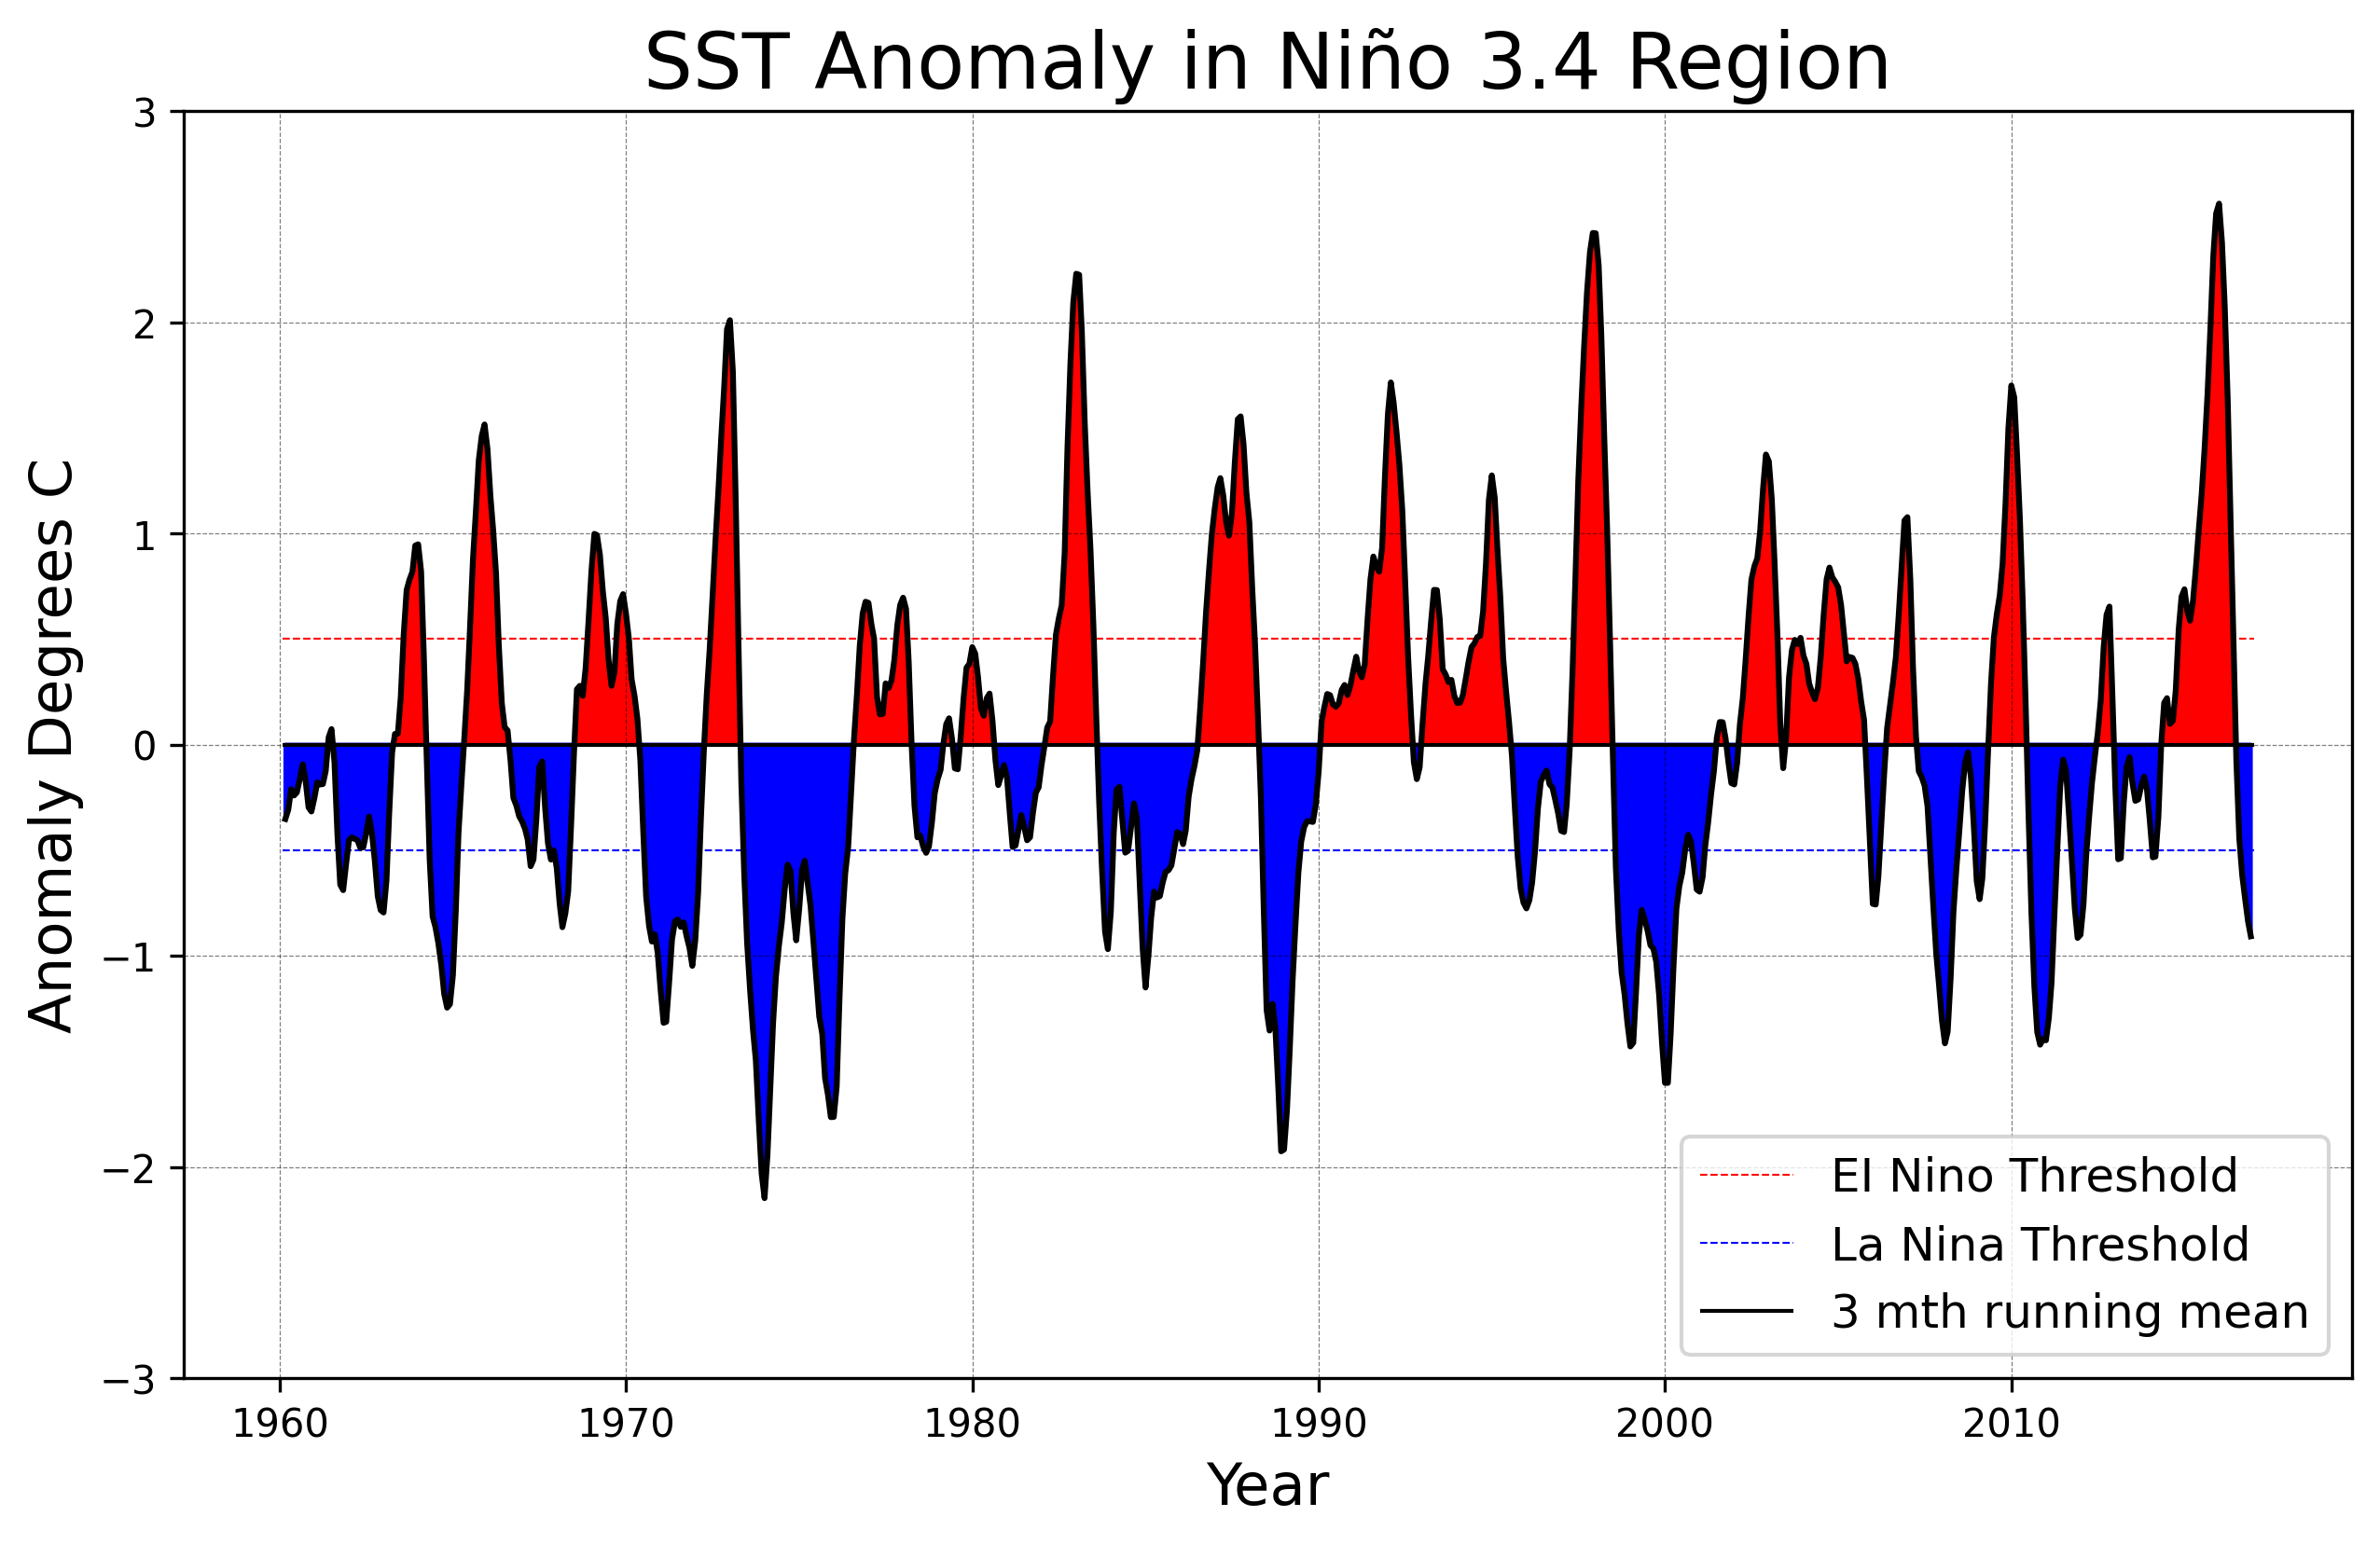

In [5]:
# Plot
# Set time serious
time = pd.date_range(start='1960-01',periods=684,freq='m')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)

ax.plot(time,line_anom,color='k')

ax.set_ylabel('Anomaly Degrees C', color='k', fontsize=15)
ax.set_xlabel('Year', color='k', fontsize=15)
ax.set_title("SST Anomaly in Niño 3.4 Region", fontsize=20)

# Plot grid lines
ax.grid(linestyle='--',linewidth=0.3,alpha=0.5,color='k')

# Put hlines into the figure
ax.hlines(y = 0.5,xmin=time[0],xmax=time[-1],color='r',linestyles='--',lw=0.5,label='EI Nino Threshold')
ax.hlines(y = -0.5,xmin=time[0],xmax=time[-1],color='b',linestyles='--',lw=0.5,label='La Nina Threshold')
ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1,label='3 mth running mean')

# Set ylabel limitation
ax.set_ylim(-3,3)

# Put legend into the figure
ax.legend(loc='best',fontsize=12)

# Fill different color into the figure
ax.fill_between(time,0,line_anom,where=(line_anom>0),color='r')
ax.fill_between(time,0,line_anom,where=(line_anom<0),color='b')

**2.1 Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.**

In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import nc_time_axis
%matplotlib inline

In [7]:
# open dataset
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")

创建4个不同的数据阵列，包括TOA长波、TOA短波、太阳辐射和网络波。创建4个子图，并将4幅不同的图片绘制成子图，包括TOA长波、TOA短波、太阳辐射和网络波。然后设置标题并设置布局。

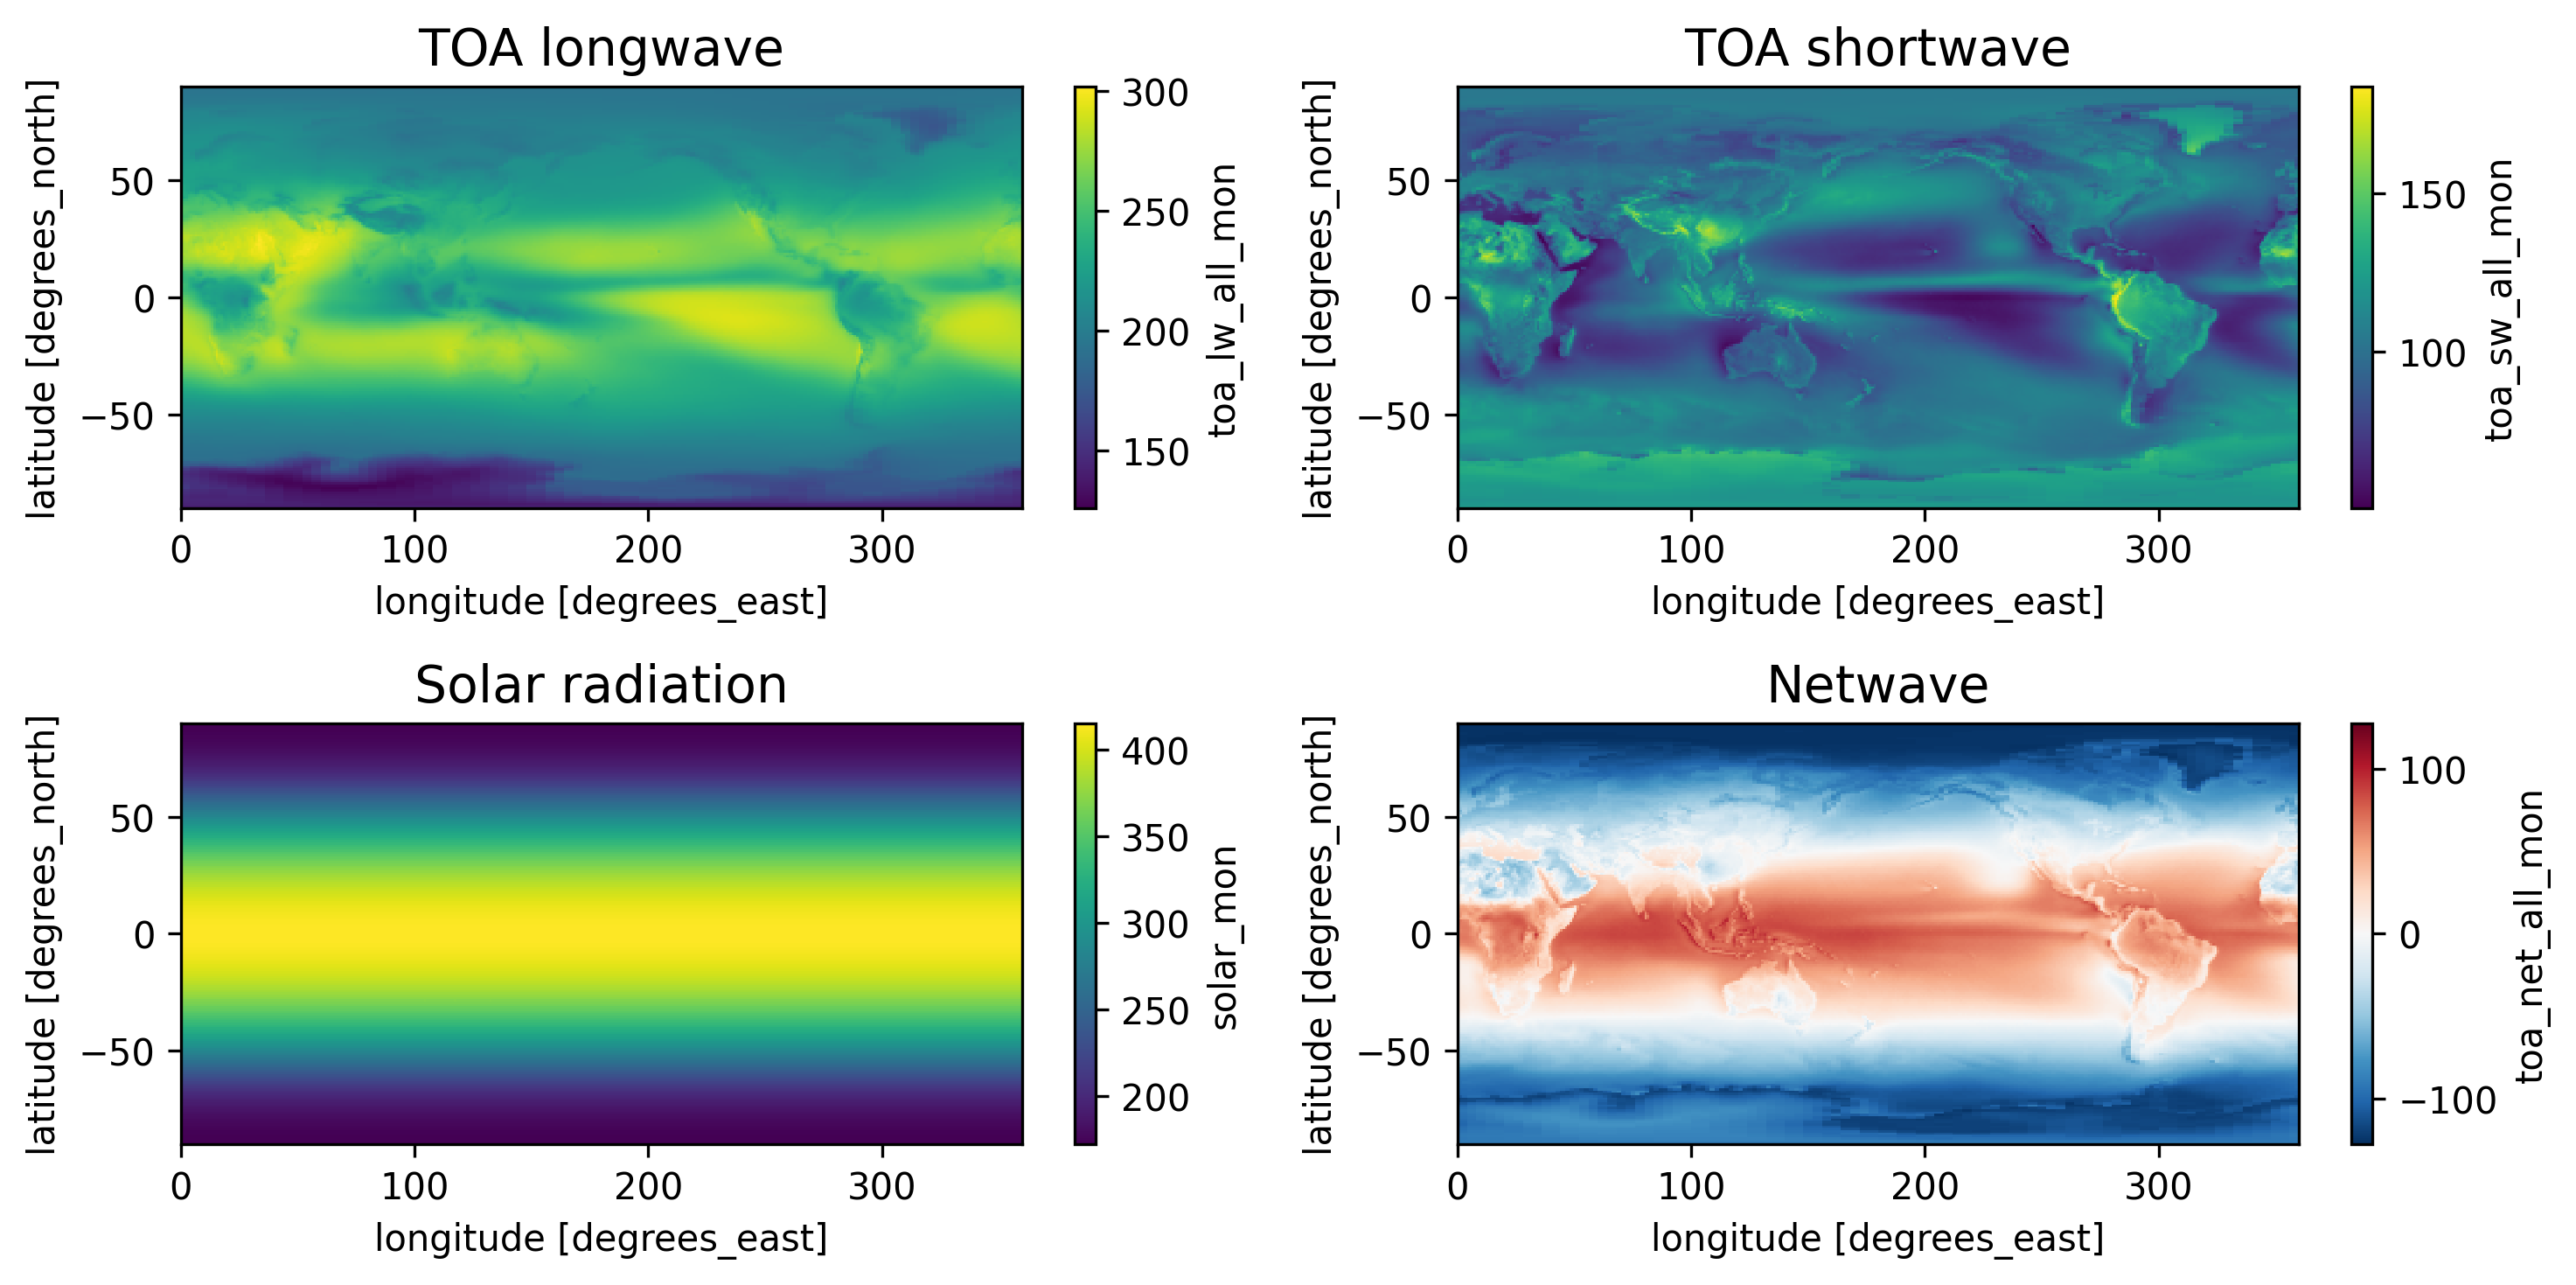

In [8]:
# dataarray of TOA longwave, shortwave, solar radiation and netwave
dalw = ds.toa_lw_all_mon
dasw = ds.toa_sw_all_mon
dasolar = ds.solar_mon
danet = ds.toa_net_all_mon

# TOA longwave, shortwave, solar radiation and netwave PLOT (mean time)
fig, axes = plt.subplots(2,2, figsize=(10,5), sharex=False, sharey=False, dpi=300)
dalw.mean('time').plot(ax=axes[0,0])
dasw.mean('time').plot(ax=axes[0,1])
dasolar.mean('time').plot(ax=axes[1,0])
danet.mean('time').plot(ax=axes[1,1])

axes[0,0].set_title('TOA longwave',fontsize = 14)
axes[0,1].set_title('TOA shortwave',fontsize = 14)
axes[1,0].set_title('Solar radiation',fontsize = 14)
axes[1,1].set_title('Netwave',fontsize = 14)

# better layout
plt.tight_layout()

(total solar radiation) - (TOA longwave) - (TOA shortwave) = (TOA net Flux)
根据该公式我们进行计算，并绘制图像如下：


Text(0.5, 1.0, '(total solar radiation) - (TOA longwave) - (TOA shortwave) = (TOA net Flux) ')

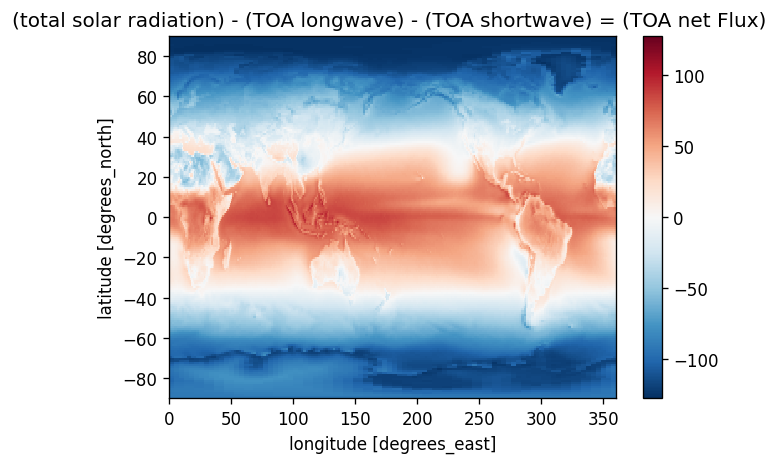

In [9]:
# (total solar radiation) - (TOA longwave) - (TOA shortwave) = (TOA net Flux) 
plt.rcParams['figure.dpi'] = 120
da_total = dasolar - dalw - dasw
da_total.mean('time').plot()
plt.title('(total solar radiation) - (TOA longwave) - (TOA shortwave) = (TOA net Flux) ')
# It is the same as the TOA net plot directly above

**2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.**

In [10]:
# Create the weights
weights = np.cos(np.deg2rad(ds.lat))

计算solar radiation、TOA longwave和TOA shortwave的加权平均值;
打印出solar radiation、long-wave radiation和short-wave radiation的值

In [11]:
weights = np.cos(np.deg2rad(ds.lat))
toa_weighted_solar = dasolar.weighted(weights)
toa_weighted_lw = dalw.weighted(weights)
toa_weighted_sw = dasw.weighted(weights)


print('solar radiations:',toa_weighted_solar.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')
print('long wave outgoing:',toa_weighted_lw.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')
print('short wave outgoing:',toa_weighted_sw.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')

solar radiations: 340.28326598091286 (Wm-2)
long wave outgoing: 240.2669337478465 (Wm-2)
short wave outgoing: 99.13805276923081 (Wm-2)


**2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.**

Text(0, 0.5, 'toa_net_all_mon/ W')

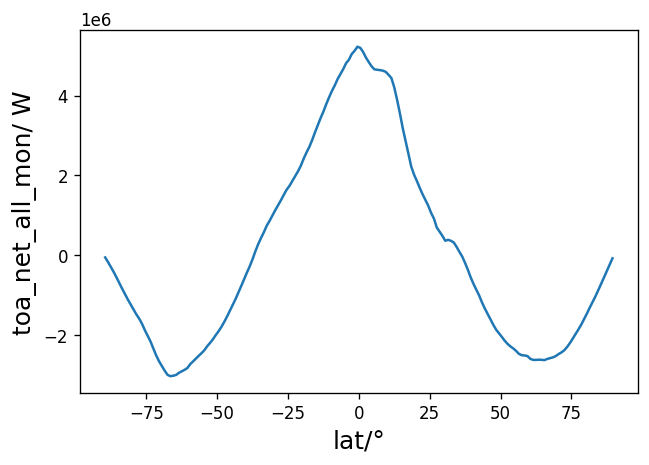

In [12]:
weights = np.cos(np.deg2rad(ds.lat))
net_weighted = ds.toa_net_all_mon.weighted(weights)
region_mean = net_weighted.sum(dim=['lon','time']).plot()
plt.xlabel('lat/°',fontsize=15)
plt.ylabel('toa_net_all_mon/ W',fontsize=15)

**2.4 Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.**

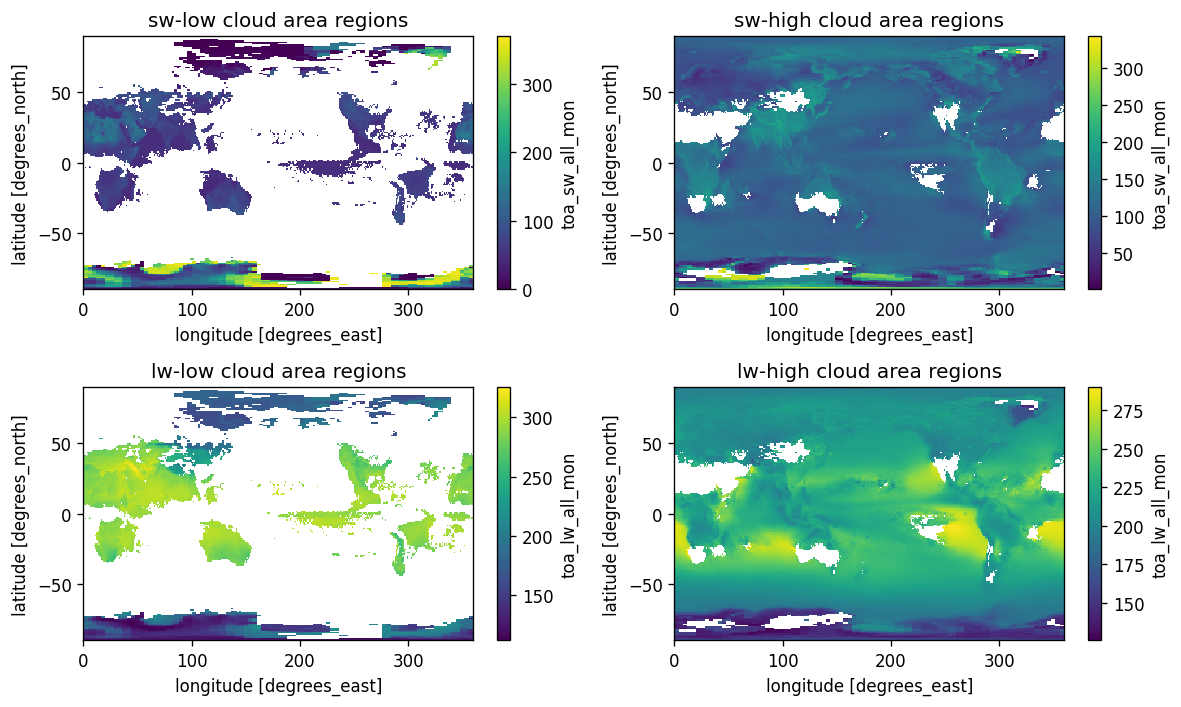

In [13]:
fig = plt.figure(figsize=(10,6), dpi=120)
grid = plt.GridSpec(4, 4)  # 4 rows 4 cols
plt.subplot(grid[0:2, 0:2])
ds.toa_sw_all_mon.where((ds.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('sw-low cloud area regions')
plt.subplot(grid[0:2, 2:4])
ds.toa_sw_all_mon.where((ds.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('sw-high cloud area regions')
plt.subplot(grid[2:4, 0:2])
ds.toa_lw_all_mon.where((ds.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('lw-low cloud area regions')
plt.subplot(grid[2:4, 2:4])
ds.toa_lw_all_mon.where((ds.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('lw-high cloud area regions')

plt.tight_layout()

**2.5 Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?**

In [14]:
# Calculate the global mean values of shortwave and longwave radiation
dalw = ds.toa_lw_all_mon
dasw = ds.toa_sw_all_mon

daclda = ds.cldarea_total_daynight_mon
arrclda = daclda.mean(dim='time').values
high_cloud_area = (arrclda>=75)
low_cloud_area = (arrclda<=25)

hclw=dalw.mean(dim='time').values
hclw[~high_cloud_area]=np.nan
hcsw=dasw.mean(dim='time').values
hcsw[~high_cloud_area]=np.nan
lclw=dalw.mean(dim='time').values
lclw[~low_cloud_area]=np.nan
lcsw=dasw.mean(dim='time').values
lcsw[~low_cloud_area]=np.nan

print('high cloud long wave:',np.nanmean(hclw),'(W/m2)')
print('high cloud short wave:',np.nanmean(hcsw),'(W/m2)')
print('low cloud long wave:',np.nanmean(lclw),'(W/m2)')
print('low cloud short wave:',np.nanmean(lcsw),'(W/m2)')

high cloud long wave: 216.55675 (W/m2)
high cloud short wave: 108.09777 (W/m2)
low cloud long wave: 270.10367 (W/m2)
low cloud short wave: 122.65546 (W/m2)


**3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.**

In [15]:
ds = xr.open_dataset("air.sig995.2012.nc")

C:\Users\ZhangBart\Anaconda3\envs\d2l-pytorch\lib\site-packages\xarray\coding\times.py:117: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [16]:
# calculate 2012 air temperature anomalies 
group_data = ds.air.groupby('time.month')
air_anom = group_data - group_data.mean(dim='time')
line_air_anom = air_anom.mean(dim={'lat','lon'})

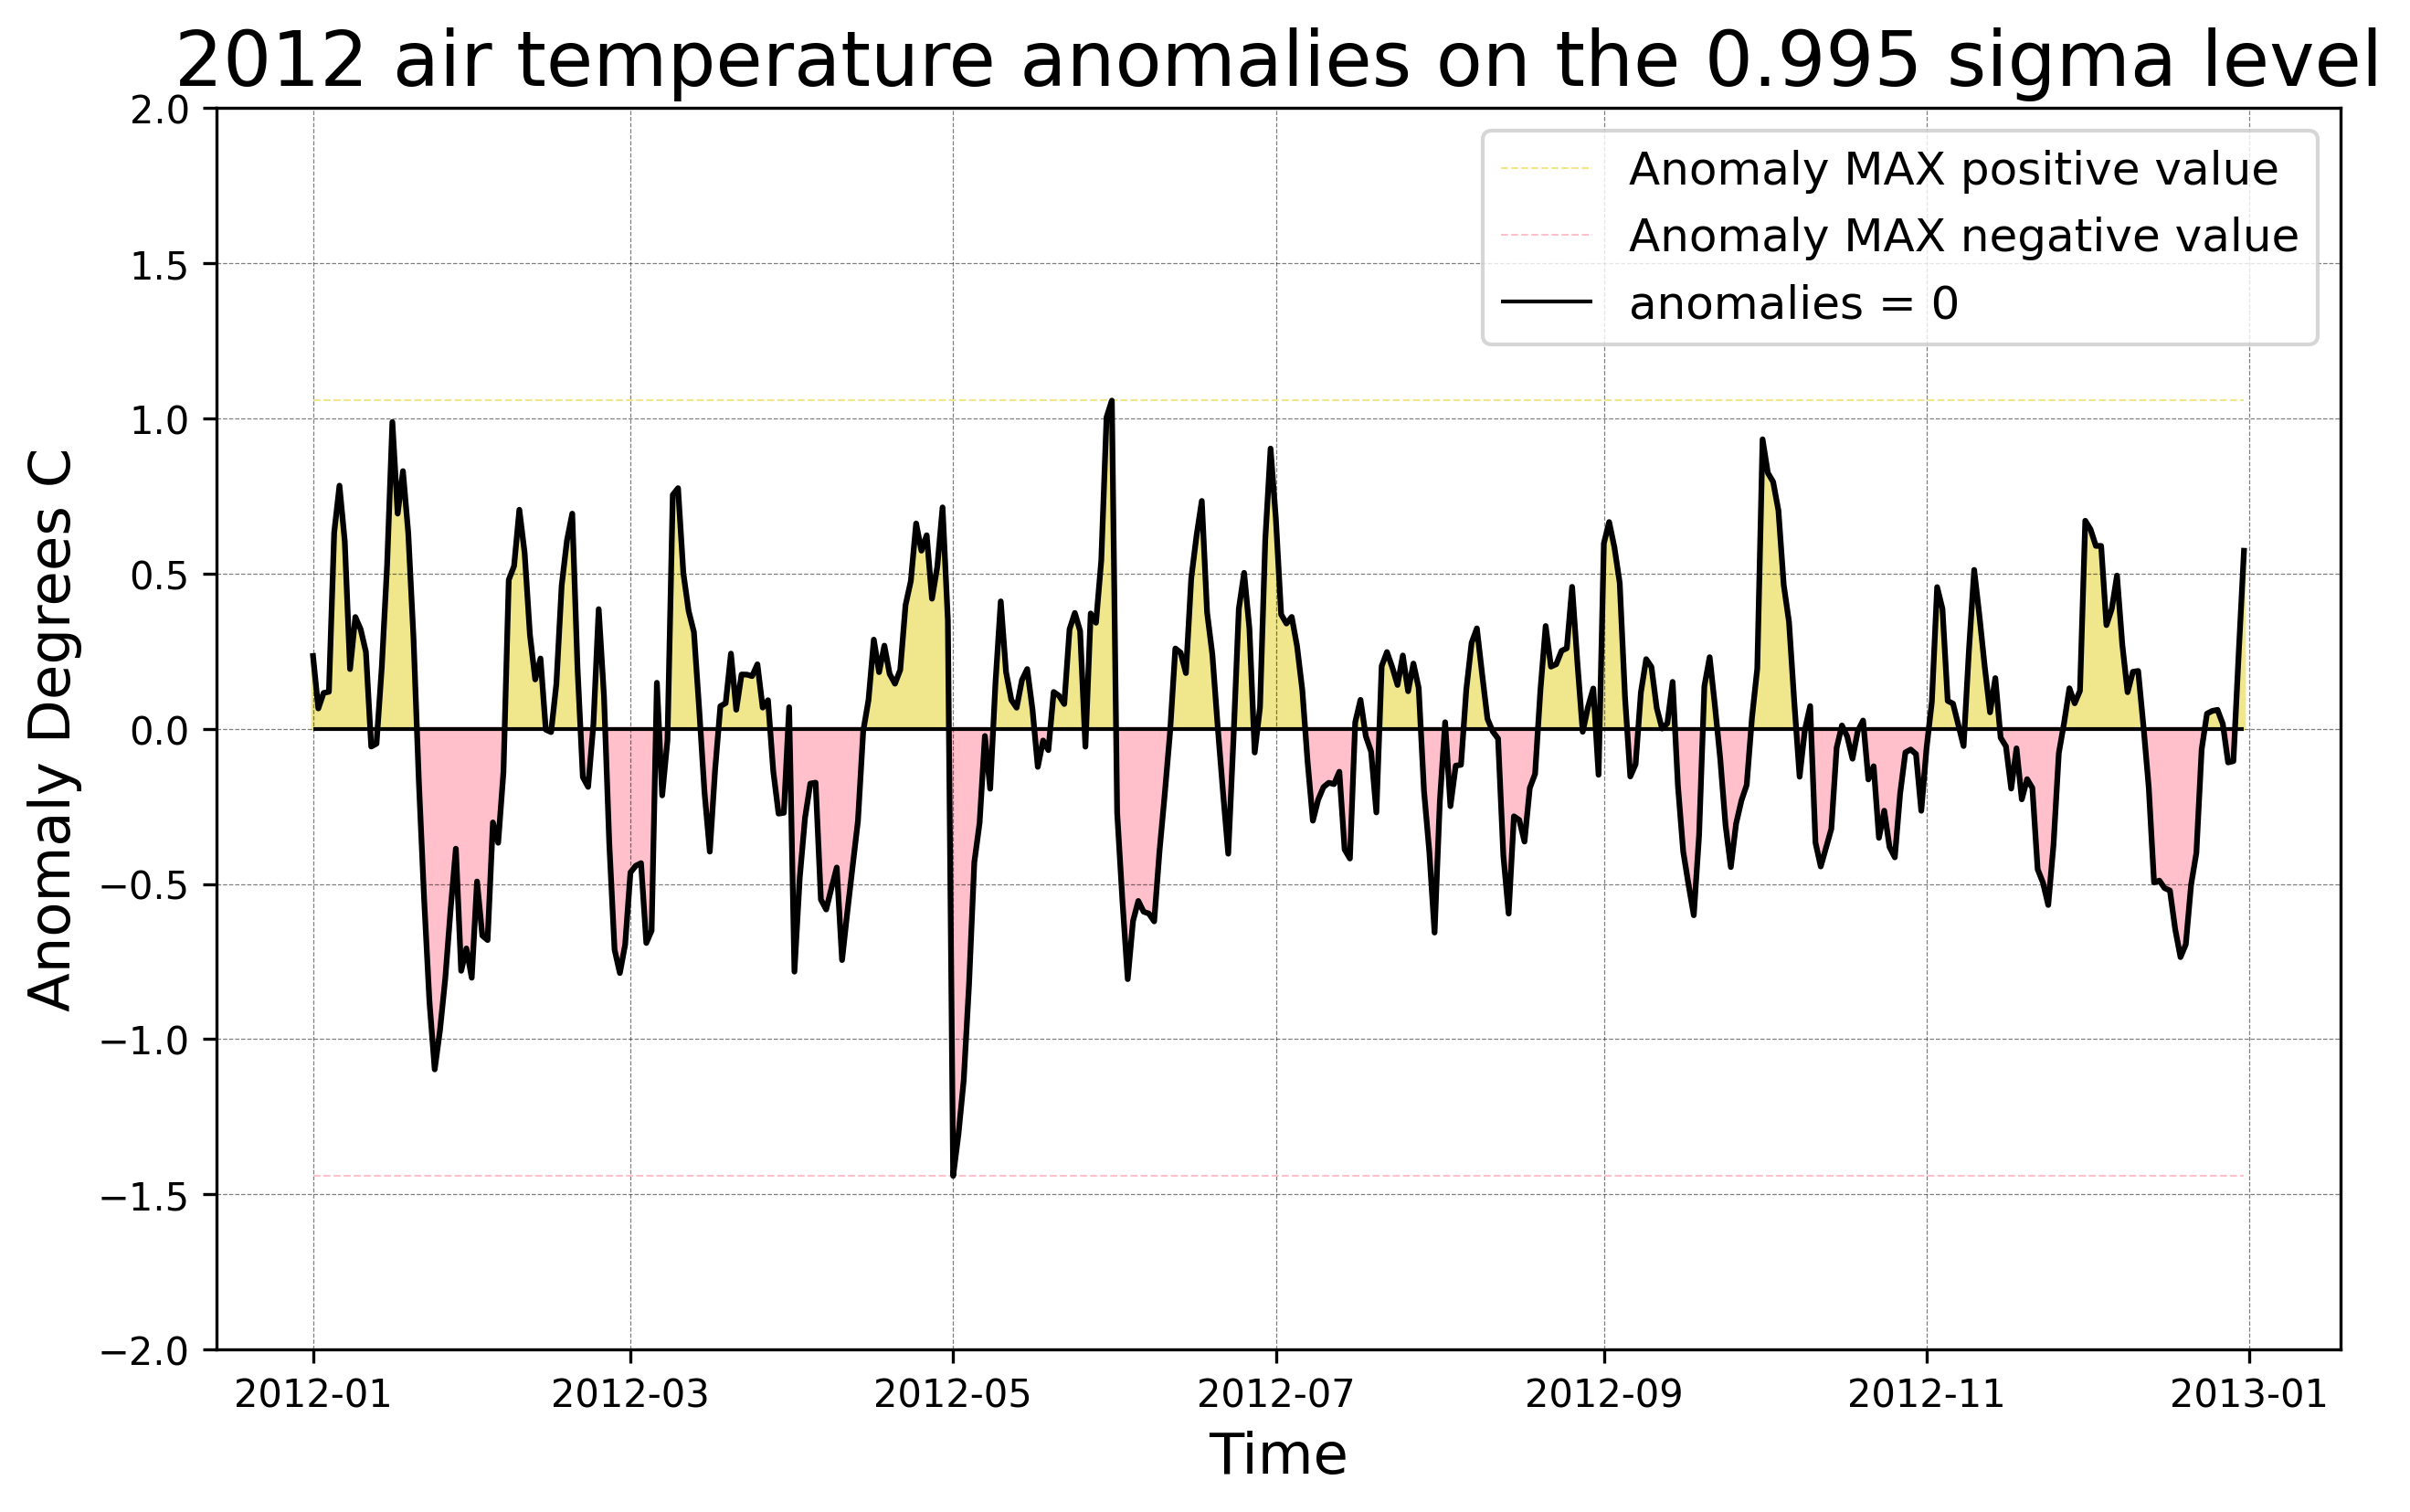

In [17]:
# plot
# set time serious
time = pd.date_range(start='2012-01-01',periods=366,freq='d')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)

# put time and anomaly into the figure
ax.plot(time,line_air_anom,color='k')

# set xlabel, ylabel and title
ax.set_ylabel('Anomaly Degrees C', color='k', fontsize=15)
ax.set_xlabel('Time', color='k', fontsize=15)
ax.set_title("2012 air temperature anomalies on the 0.995 sigma level", fontsize=20)

# Plot grid lines
ax.grid(linestyle='--',linewidth=0.3,alpha=0.5,color='k')

# put hlines into the figure
ax.hlines(y = line_air_anom.max(),xmin=time[0],xmax=time[-1],color='khaki',linestyles='--',lw=0.5,label='Anomaly MAX positive value')
ax.hlines(y = line_air_anom.min(),xmin=time[0],xmax=time[-1],color='pink',linestyles='--',lw=0.5,label='Anomaly MAX negative value')
ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1,label='anomalies = 0')

# set ylabel limitation
ax.set_ylim(-2,2)
# put legend into the figure
ax.legend(loc='best',fontsize=12)

# fill different color into the figure
ax.fill_between(time,0,line_air_anom,where=(line_air_anom>0),color='khaki')
ax.fill_between(time,0,line_air_anom,where=(line_air_anom<0),color='pink')

**3.2 Make at least 5 different plots using the dataset**

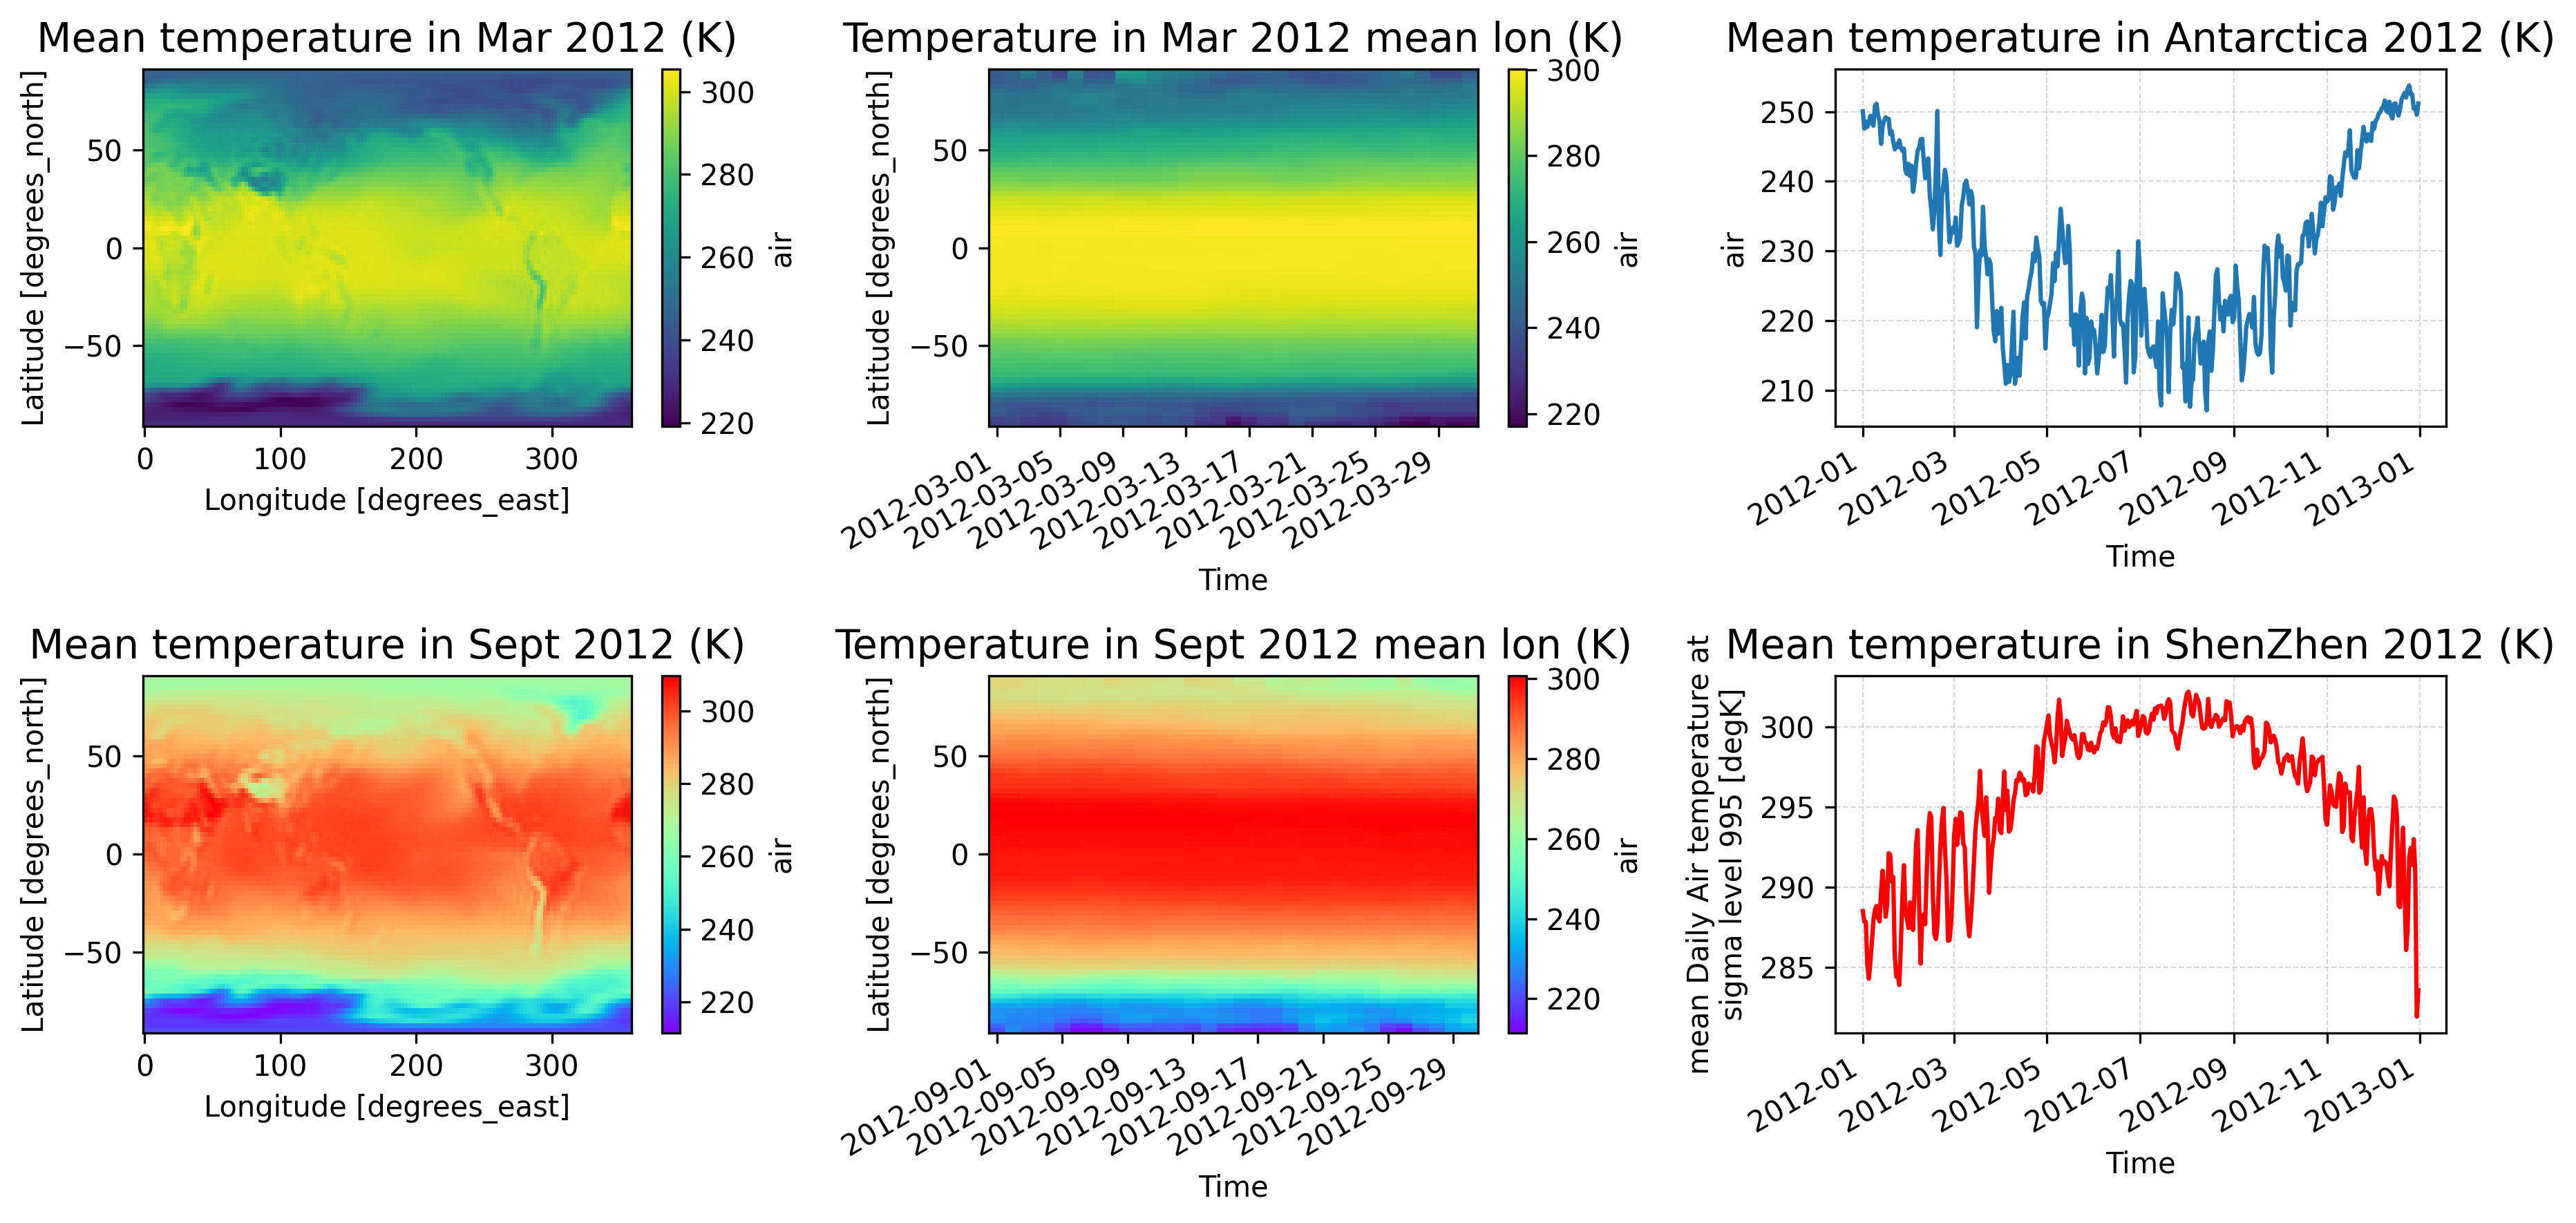

In [18]:
fig, axes = plt.subplots(2,3, figsize=(12,6), sharex=False, sharey=False, dpi=300)
da_air = ds.air
da_air_Mar = ds.air.sel(time=slice('2012-03-01', '2012-03-31'))
da_air_Sept = ds.air.sel(time=slice('2012-09-01','2012-09-30'))
da_air_shenzhen = ds.air.sel(lon='114',lat='22.5',method='nearest')
da_air_Ant = ds.air.sel(lat='-90',method='nearest')



da_air_Mar.mean('time').plot(ax=axes[0,0])
da_air_Sept.mean('time').plot(ax=axes[1,0],cmap='rainbow')
da_air_Mar.mean('lon').transpose().plot(ax=axes[0,1])
da_air_Sept.mean('lon').transpose().plot(ax=axes[1,1],cmap='rainbow')
da_air_shenzhen.plot(ax=axes[1,2],c='r')
da_air_Ant.mean('lon').plot(ax=axes[0,2])


axes[0,2].grid(linestyle='--', linewidth=0.5, alpha=0.5)
axes[1,2].grid(linestyle='--', linewidth=0.5, alpha=0.5)


axes[0,0].set_title('Mean temperature in Mar 2012 (K)',fontsize = 14)
axes[1,0].set_title('Mean temperature in Sept 2012 (K)',fontsize = 14)
axes[0,1].set_title('Temperature in Mar 2012 mean lon (K)',fontsize = 14)
axes[1,1].set_title('Temperature in Sept 2012 mean lon (K)',fontsize = 14)
axes[1,2].set_title('Mean temperature in ShenZhen 2012 (K)',fontsize = 14)
axes[0,2].set_title('Mean temperature in Antarctica 2012 (K)',fontsize = 14)

# better layout
plt.tight_layout()